In [ ]:
%load_ext cython

In [ ]:
pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.0 MB/s eta 0:00:00


In [ ]:
pip install feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2434 sha256=d9086cb72d154ba967c9e8a7a4f6b741a9c28ce5f64782072e09d1bf8cc162a5
  Stored in directory: /root/.cache/pip/wheels/77/5b/0e/0e63d10b6353208a085a321ea2eed2578f220a77bb8a4bd7ab
Successfully built feather-format


In [1]:
pip install geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [2]:
import ee
import geemap
import geopandas as gpd

In [3]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='gee-colab-451315')

### Functions

In [4]:
## Transform to a dataframe pandas
import pandas as pd

def ee_array_to_df(arr, list_of_bands: list):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Extract the value from the  dictionary of time
    df['time'] = df['time'].apply(lambda x: x.get('value'))

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    #df = df[['time','datetime',  *list_of_bands]]

    return df

## GEE Integration

### Geometries

In [8]:
# Rice feature collection
rice_features = [
    ee.Feature( ee.Geometry.Point([-49.435879783905484, -28.902133069886883]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "0"
            }),
        ee.Feature(ee.Geometry.Point([-49.61185458138357, -28.89217182941817]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "1"
            }),
        ee.Feature(ee.Geometry.Point([-49.87183000366223, -29.217704299502333]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "2"
            }),
        ee.Feature(ee.Geometry.Point([-49.76577951032895, -29.2657557859032]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "3"
            }),
        ee.Feature(ee.Geometry.Point([-49.84041134137267, -29.130259469153103]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "4"
            }),
        ee.Feature(ee.Geometry.Point([-49.702032752551574, -29.04351424852763]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "5"
            }),
        ee.Feature( ee.Geometry.Point([-49.659075802221885, -28.976813288925428]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.548243184385704, -28.76706250594352]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.70887468156988, -29.091552741196722]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.7793965254817, -28.873504839562873]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.6660789085507, -28.73843100596921]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.55950521345754, -28.644014500340976]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.180830983291564, -28.677869047597742]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.339232252075675, -28.830707048058496]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "13"
            })
]

In [7]:
non_rice_features = [ee.Feature(
            ee.Geometry.Point([-49.31830572516361, -28.80994301343562]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.5175535261101, -28.843237156676683]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.7883108360364, -29.250620310519498]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.894618261604876, -29.165695713577016]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.85793485133627, -29.082816660238777]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.67431620525186, -29.07787805147704]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.7106652143715, -29.043496521950697]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.691295616338145, -28.95291983121575]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.71910690594036, -28.88686969570478]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.557727945724096, -28.824716877494183]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.5622616651423, -28.996909401529603]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.573754703185266, -28.714609759266008]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.141014101858886, -28.721222442214646]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.341275016543236, -28.588698416682785]),
            {
              "label": "non_rice",
              "class": 2,
              "system:index": "13"
            })]

In [9]:
rice = ee.FeatureCollection(rice_features)
non_rice = ee.FeatureCollection(non_rice_features)

In [13]:
bbox = ee.Geometry.MultiPolygon([
    [[
        [-49.84741758794654, -29.00447875638799],
        [-49.84741758794654, -29.044105980024618],
        [-49.79025434942115, -29.044105980024618],
        [-49.79025434942115, -29.00447875638799]
    ]],
    [[
        [-49.57670759649146, -28.95116818805155],
        [-49.57670759649146, -28.981205689723232],
        [-49.54117369146216, -28.981205689723232],
        [-49.54117369146216, -28.95116818805155]
    ]],
    [[
        [-49.628848119003905, -28.92688012614708],
        [-49.628848119003905, -28.932288787369195],
        [-49.621638341171874, -28.932288787369195],
        [-49.621638341171874, -28.92688012614708]
    ]],
    [[
        [-49.49138568266453, -28.881505218913308],
        [-49.49138568266453, -28.917873920680577],
        [-49.42186282499851, -28.917873920680577],
        [-49.42186282499851, -28.881505218913308]
    ]],
    [[
        [-49.512671693406716, -28.92178054362075],
        [-49.512671693406716, -28.93214740632082],
        [-49.491214021287576, -28.93214740632082],
        [-49.491214021287576, -28.92178054362075]
    ]]
], None, False)

In [ ]:

rice_features = [ee.Feature(ee.Geometry.Point([-49.435879783905484, -28.902133069886883]),
            { "label": "rice",
              "class": 1,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.481581532518135, -28.889008215432487]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.50680910098515, -28.928226240614016]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.60820016737271, -28.9085686753252]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.61185458138357, -28.89217182941817]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.773998900294195, -28.977197667385102]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.87341848186553, -29.092031833637595]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.871250646515016, -29.219764319203595]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.80640521526931, -29.27670078701205]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.76577951032895, -29.2657557859032]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.84214941281432, -29.136032337071146]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.70244044832184, -29.038130161170116]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.64514977301656, -29.005079321893174]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([-49.548243184385704, -28.76706250594352]),
            {
              "label": "rice",
              "class": 1,
              "system:index": "13"
            })
        ]
rice = ee.FeatureCollection(rice_features)

# Banana feature collection
banana_features = [
    ee.Feature(ee.Geometry.Point([-49.831709225953794, -29.02012223724929]), {"label": "banana", "system:index": "0"}),
    ee.Feature(ee.Geometry.Point([-49.83103330928204, -29.01920281439204]), {"label": "banana", "system:index": "1"}),
    ee.Feature(ee.Geometry.Point([-49.82952206280439, -29.0158225336986]), {"label": "banana", "system:index": "2"}),
    ee.Feature(ee.Geometry.Point([-49.83091681149213, -29.014949984047412]), {"label": "banana", "system:index": "3"}),
    ee.Feature(ee.Geometry.Point([-49.83167855885236, -29.015137629755767]), {"label": "banana", "system:index": "4"}),
    ee.Feature(ee.Geometry.Point([-49.81508736473627, -29.028398873292396]), {"label": "banana", "system:index": "5"}),
    ee.Feature(ee.Geometry.Point([-49.8148218260438, -29.0279978316776]), {"label": "banana", "system:index": "6"}),
    ee.Feature(ee.Geometry.Point([-49.813400255265904, -29.027803173490142]), {"label": "banana", "system:index": "7"}),
    ee.Feature(ee.Geometry.Point([-49.81369529825754, -29.02846688604333]), {"label": "banana", "system:index": "8"}),
    ee.Feature(ee.Geometry.Point([-49.81297110182352, -29.028101023820902]), {"label": "banana", "system:index": "9"}),
    ee.Feature(ee.Geometry.Point([-49.81069964794239, -29.036933486997842]), {"label": "banana", "system:index": "10"}),
    ee.Feature(ee.Geometry.Point([-49.809857434311716, -29.03654889412084]), {"label": "banana", "system:index": "11"}),
    ee.Feature(ee.Geometry.Point([-49.808677262345164, -29.036173680176777]), {"label": "banana", "system:index": "12"})
]
banana = ee.FeatureCollection(banana_features)

# Eucalipto feature collection
eucalipto_features = [
    ee.Feature(ee.Geometry.Point([-49.62652391637377, -28.9294736286191]), {"label": "", "system:index": "0"}),
    ee.Feature(ee.Geometry.Point([-49.62583727086596, -28.92965673437171]), {"label": "", "system:index": "1"}),
    ee.Feature(ee.Geometry.Point([-49.56036596552412, -28.963403232025385]), {"label": "", "system:index": "2"}),
    ee.Feature(ee.Geometry.Point([-49.56313778586234, -28.961420234692962]), {"label": "", "system:index": "3"}),
    ee.Feature(ee.Geometry.Point([-49.56226875014151, -28.96085700405981]), {"label": "", "system:index": "4"}),
    ee.Feature(ee.Geometry.Point([-49.56453516243707, -28.960830738900402]), {"label": "", "system:index": "5"}),
    ee.Feature(ee.Geometry.Point([-49.550605100214106, -28.977010653951456]), {"label": "", "system:index": "6"}),
    ee.Feature(ee.Geometry.Point([-49.55280247592935, -28.978815270769157]), {"label": "", "system:index": "7"}),
    ee.Feature(ee.Geometry.Point([-49.55178860092172, -28.9780081082556]), {"label": "", "system:index": "8"})
]
eucalipto = ee.FeatureCollection(eucalipto_features)

# Define bbox geometry


# Water feature collection
water_features = [
    ee.Feature(ee.Geometry.Point([-49.48013331152931, -28.914603635138963]), {"label": "water", "system:index": "0"}),
    ee.Feature(ee.Geometry.Point([-49.469704882879405, -28.904479218928568]), {"label": "water", "system:index": "1"}),
    ee.Feature(ee.Geometry.Point([-49.45318727776964, -28.90177879627048]), {"label": "water", "system:index": "2"}),
    ee.Feature(ee.Geometry.Point([-49.4458915812378, -28.904919642050118]), {"label": "water", "system:index": "3"})
]
water = ee.FeatureCollection(water_features)


Display the map

In [10]:
Map = geemap.Map()
Map.add_basemap("HYBRID")

Map.addLayer(rice, {'color': 'green'}, 'Rice')
Map.addLayer(non_rice, {'color': 'yellow'}, 'Banana'))
Map.centerObject(rice,12)
display(Map)


Map(center=[-28.932379227132817, -49.618977630989455], controls=(WidgetControl(options=['position', 'transpare…

### Sentinel-1

Fetch Sentinel-1 data using GEE.

Sentinel-1 follows the following knoledge-rule:
- Filter Transmiter Receiver Polarization: VV
- Instrument Mode: IW
- Orbit: Descending

- **Monthly temporal aggregation**
- *Speckel Filtered *

In [14]:
# Merge samples
amostras = rice.merge(non_rice)
print(amostras.getInfo())

# Add Data
time_start = '2020'
time_end = '2022'

# Index Function
def indices(image):
    # Radar Vegetation Index
    rvi = image.expression('sqrt(vv/(vv + vh))*(vv/vh)',
                          {'vv': image.select('VV'),
                           'vh': image.select('VH')
                          }).rename('RVI')

    vvvh = image.expression('(vv/vh)',
                           {'vv': image.select('VV'),
                            'vh': image.select('VH')
                           }).rename('VVVH')

    return image.addBands([rvi, vvvh])

# ------------ SENTINEL1 RETRIEVE
sen1 = ee.ImageCollection("COPERNICUS/S1_GRD") \
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')) \
        .filter(ee.Filter.eq('instrumentMode', 'IW')) \
        .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING')) \
        .filterDate(time_start, time_end) \
        .filterBounds(bbox) \
        .select('VV', 'VH') \
        .map(lambda image:
             image.updateMask(image.mask().And(image.lt(-30.0).Not()))
            ) \
        .map(indices)

print(sen1.getInfo())

# Select Descending orbit pass
des = sen1.filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))

# Print dates in collection
dates = sen1.aggregate_array('system:time_start').map(lambda idx: ee.Date(idx))
print(dates.getInfo())

# ------- Composite Monthly  -----------------------------------
years = ee.List.sequence(2020, 2023)
months = ee.List.sequence(1, 12)

def create_monthly_composites(y):
    def process_month(m):
        sen1_month = sen1.filter(ee.Filter.calendarRange(y, y, 'year')) \
                        .filter(ee.Filter.calendarRange(m, m, 'month')) \
                        .median()

        return sen1_month.set('year', y) \
                        .set('month', m) \
                        .set('system:time_start', ee.Date.fromYMD(y, m, 1))

    return months.map(process_month)

monthly_year_sen1 = ee.ImageCollection.fromImages(
    years.map(create_monthly_composites).flatten())

print('Sentinel1 Monthly: ', monthly_year_sen1.getInfo())

# Speckel filtering - uses a buffer
def apply_speckle_filter(img):
    filtered = img.focalMean(30, 'square', 'meters')
    return filtered.copyProperties(img, img.propertyNames())

speckel = monthly_year_sen1.map(apply_speckle_filter)
print('Speckel', speckel.getInfo())

# For visualization in Python, you can use geemap or other visualization libraries
# Here's how you might visualize using geemap in a Jupyter notebook:

# import geemap.foliumap as geemap
# Map = geemap.Map()
# Map.addLayer(monthly_year_sen1.first().clip(bbox), {}, 'SEN1')
# Map.addLayer(speckel.first().clip(bbox), {}, 'Speckle')
# Map.addLayer(speckel.first().select('RVI').clip(bbox), {}, 'RVI')
# Map.centerObject(bbox)
# Map

{'type': 'FeatureCollection', 'columns': {'class': 'Integer', 'label': 'String', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-49.435879783905484, -28.902133069886883]}, 'id': '1_0', 'properties': {'class': 1, 'label': 'rice'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-49.61185458138357, -28.89217182941817]}, 'id': '1_1', 'properties': {'class': 1, 'label': 'rice'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-49.87183000366223, -29.217704299502333]}, 'id': '1_2', 'properties': {'class': 1, 'label': 'rice'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-49.76577951032895, -29.2657557859032]}, 'id': '1_3', 'properties': {'class': 1, 'label': 'rice'}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-49.84041134137267, -29.130259469153103]}, 'id': '1_4', 'properties': {'class': 1, 'label': 'rice'}}, {'type': 'Feature', 'geometry': {'type': 

In [15]:
# ----------------------------------------------
# Sentinel-2 Image Collection
# ----------------------------------------------
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

sentinel2 = ee.ImageCollection("COPERNICUS/S2") \
    .filterDate(time_start, time_end) \
    .filterBounds(bbox) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 15)) \
    .select(['B2', 'B3', 'B4', 'B8']) \
    .map(add_ndvi)

print("S2 Collection Size:", sentinel2.size().getInfo())

# ----------------------------------------------
# Monthly Composites
# ----------------------------------------------
years = ee.List.sequence(2020, 2022)
months = ee.List.sequence(1, 12)

def monthly_composites(y):
    def process_month(m):
        monthly = sentinel2 \
            .filter(ee.Filter.calendarRange(y, y, 'year')) \
            .filter(ee.Filter.calendarRange(m, m, 'month')) \
            .median() \
            .set('year', y) \
            .set('month', m) \
            .set('system:time_start', ee.Date.fromYMD(y, m, 1))
        return monthly
    return months.map(process_month)

monthly_s2 = ee.ImageCollection.fromImages(
    years.map(monthly_composites).flatten()
)

print('Monthly S2 NDVI Composite Size:', monthly_s2.size().getInfo())


S2 Collection Size: 119
Monthly S2 NDVI Composite Size: 36


In [16]:
### Create a dict containing the crops and the values of the bands from S1 and S2
types_crops = [rice, non_rice]
name_crops = ['rice','non_rice']

## Loop through crops
dict_of_crops = {}
for i,crop in enumerate(types_crops):
  dict_of_crops[name_crops[i]] = speckel.getRegion(crop, 10).getInfo()


## Create a dict containing dataframe  of each crops
dict_of_df =  dict()
for key,value in dict_of_crops.items():
  dict_of_df[key] = ee_array_to_df(value,['VV', 'VH', 'RVI', 'VVVH'])

## Create a dict of geodataframe
dict_of_gdf = dict()

for key,value in dict_of_df.items():
  dict_of_gdf[key] = gpd.GeoDataFrame(value, geometry=gpd.points_from_xy(value['longitude'], value['latitude']))

  # new column with Well-Known Text
  dict_of_gdf[key]['point_id'] = dict_of_gdf[key]['geometry'].apply(lambda geom: geom.wkt)

  ## Get unique
  unique_points = dict_of_gdf[key].groupby('point_id').size().reset_index(name='count')
  unique_points['point_label'] = 'Point_' + unique_points.index.astype(str)

  ## Merge point_label back in the dataframe
  dict_of_gdf[key] = pd.merge(dict_of_gdf[key], unique_points[['point_id', 'point_label']], on='point_id', how='left')


In [17]:
### SENTINEL 2

# Extract values
dict_of_crops_s2 = {}
for i, crop in enumerate(types_crops):
    # Extract pixel values from monthly composite collection over point features (scale = 10m)
    dict_of_crops_s2[name_crops[i]] = monthly_s2.getRegion(crop, 10).getInfo()


# List of bands
s2_bands = ['B2', 'B3', 'B4', 'B8', 'NDVI']

# Build dataframes
dict_of_df_s2 = {}
for key, value in dict_of_crops_s2.items():
    dict_of_df_s2[key] = ee_array_to_df(value, s2_bands)

# Build GeoDataFrames
dict_of_gdf_s2 = {}
for key, df in dict_of_df_s2.items():
    if df.empty:
        continue

    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

    # Add unique point IDs using WKT
    gdf['point_id'] = gdf['geometry'].apply(lambda geom: geom.wkt)

    # Create unique point labels
    unique_points = gdf.groupby('point_id').size().reset_index(name='count')
    unique_points['point_label'] = 'Point_' + unique_points.index.astype(str)

    # Merge point label
    gdf = pd.merge(gdf, unique_points[['point_id', 'point_label']], on='point_id', how='left')

    dict_of_gdf_s2[key] = gdf

In [19]:
dict_of_gdf_s2['non_rice']

,longitude,latitude,time,B2,B3,B4,B8,NDVI,datetime,geometry,point_id,point_label
0,-49.141035,-28.721251,1577836800000,1248.0,1269.0,1225.0,3636.0,0.495988,2020-01-01,POINT (-49.14104 -28.72125),POINT (-49.14103506059645 -28.721250674218783),Point_0
1,-49.141035,-28.721251,1580515200000,994.5,952.0,766.0,3789.0,0.663545,2020-02-01,POINT (-49.14104 -28.72125),POINT (-49.14103506059645 -28.721250674218783),Point_0
2,-49.141035,-28.721251,1583020800000,1082.0,1017.5,943.0,3458.5,0.578736,2020-03-01,POINT (-49.14104 -28.72125),POINT (-49.14103506059645 -28.721250674218783),Point_0
3,-49.141035,-28.721251,1585699200000,1043.0,1008.0,901.0,2510.0,0.374213,2020-04-01,POINT (-49.14104 -28.72125),POINT (-49.14103506059645 -28.721250674218783),Point_0
4,-49.141035,-28.721251,1588291200000,1233.0,1203.0,1237.0,2834.0,0.383470,2020-05-01,POINT (-49.14104 -28.72125),POINT (-49.14103506059645 -28.721250674218783),Point_0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,-49.857891,-29.082823,1627776000000,1147.0,1045.0,1191.0,1463.0,0.102487,2021-08-01,POINT (-49.85789 -29.08282),POINT (-49.85789065732383 -29.08282257607689),Point_12
320,-49.857891,-29.082823,1630454400000,965.5,916.0,786.0,1998.0,0.425321,2021-09-01,POINT (-49.85789 -29.08282),POINT (-49.85789065732383 -29.08282257607689),Point_12
321,-49.857891,-29.082823,1633046400000,862.0,814.0,450.5,4278.0,0.809440,2021-10-01,POINT (-49.85789 -29.08282),POINT (-49.85789065732383 -29.08282257607689),Point_12
322,-49.857891,-29.082823,1635724800000,1071.0,1003.0,756.5,4174.5,0.703329,2021-11-01,POINT (-49.85789 -29.08282),POINT (-49.85789065732383 -29.08282257607689),Point_12


### Viz

In [30]:
import plotly.express as px

## Filter dataset
#gdf_plot = gdf_banana[gdf_banana['point_label']=='Point_2']
gdf_rice = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']
fig = px.line(gdf_rice, x="datetime", y="VV", color='point_label')
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming gdf_banana is your geodataframe
# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Get unique point labels for consistent coloring
point_labels = gdf_banana['point_label'].unique()
colors = px.colors.qualitative.Plotly  # Using Plotly's default color sequence

# Create traces for each metric and each point_label
# Initially visible for 'VV', hidden for others
for i, point in enumerate(point_labels):
    point_data = gdf_banana[gdf_banana['point_label'] == point]
    color_idx = i % len(colors)  # Cycle through colors if more points than colors

    # VV traces (visible by default)
    fig.add_trace(
        go.Scatter(
            x=point_data["datetime"],
            y=point_data["VV"],
            mode='lines',
            name=f"{point} - VV",
            line=dict(color=colors[color_idx]),
            legendgroup=point,
            visible=True
        )
    )

    # RVI traces (hidden by default)
    fig.add_trace(
        go.Scatter(
            x=point_data["datetime"],
            y=point_data["RVI"],
            mode='lines',
            name=f"{point} - RVI",
            line=dict(color=colors[color_idx]),
            legendgroup=point,
            visible=False
        )
    )

    # VVVH traces (hidden by default)
    fig.add_trace(
        go.Scatter(
            x=point_data["datetime"],
            y=point_data["VVVH"],
            mode='lines',
            name=f"{point} - VVVH",
            line=dict(color=colors[color_idx]),
            legendgroup=point,
            visible=False
        )
    )

    # VH traces (hidden by default)
    fig.add_trace(
        go.Scatter(
            x=point_data["datetime"],
            y=point_data["VH"],
            mode='lines',
            name=f"{point} - VH",
            line=dict(color=colors[color_idx]),
            legendgroup=point,
            visible=False
        )
    )

# Define updatemenus for switching between metrics
updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'VV',
                'args': [{'visible': [i % 4 == 0 for i in range(len(point_labels) * 4)]},
                         {'title': 'Time Series: VV',
                          'yaxis': {'title': 'VV (dB)'}}]
            },
            {
                'method': 'update',
                'label': 'RVI',
                'args': [{'visible': [i % 4 == 1 for i in range(len(point_labels) * 4)]},
                         {'title': 'Time Series: RVI',
                          'yaxis': {'title': 'RVI'}}]
            },
            {
                'method': 'update',
                'label': 'VVVH',
                'args': [{'visible': [i % 4 == 2 for i in range(len(point_labels) * 4)]},
                         {'title': 'Time Series: VVVH',
                          'yaxis': {'title': 'VVVH (dB)'}}]
            },
            {
                'method': 'update',
                'label': 'VH',
                'args': [{'visible': [i % 4 == 3 for i in range(len(point_labels) * 4)]},
                         {'title': 'Time Series: VH',
                          'yaxis': {'title': 'VH (dB)'}}]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

# Update figure layout
fig.update_layout(
    title='Time Series: VV',
    xaxis_title='Date',
    yaxis_title='VV (dB)',
    updatemenus=updatemenus,
    legend_title='Points',
    hovermode='closest'
)

# Show the figure
fig.show()

In [26]:
dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

,longitude,latitude,time,VV,VH,RVI,VVVH,datetime,geometry,point_id,point_label
0,-49.765813,-29.26572,1577836800000,-12.954082,-19.184995,0.437908,0.684397,2020-01-01,POINT (-49.76581 -29.26572),POINT (-49.76581334070158 -29.265719567923625),Point_8
1,-49.765813,-29.26572,1580515200000,-11.005355,-19.411279,0.350922,0.578029,2020-02-01,POINT (-49.76581 -29.26572),POINT (-49.76581334070158 -29.265719567923625),Point_8
2,-49.765813,-29.26572,1583020800000,-13.588614,-17.626440,0.518915,0.780704,2020-03-01,POINT (-49.76581 -29.26572),POINT (-49.76581334070158 -29.265719567923625),Point_8
3,-49.765813,-29.26572,1585699200000,-15.515147,-17.975695,0.568775,0.840675,2020-04-01,POINT (-49.76581 -29.26572),POINT (-49.76581334070158 -29.265719567923625),Point_8
4,-49.765813,-29.26572,1588291200000,-11.583184,-18.913041,0.385777,0.620173,2020-05-01,POINT (-49.76581 -29.26572),POINT (-49.76581334070158 -29.265719567923625),Point_8
...,...,...,...,...,...,...,...,...,...,...,...
272,-49.435862,-28.902171,1598918400000,-24.220499,-24.303683,0.539610,0.804168,2020-09-01,POINT (-49.43586 -28.90217),POINT (-49.43586213684448 -28.902171372440453),Point_1
273,-49.435862,-28.902171,1601510400000,-16.188629,-24.687494,0.345402,0.563451,2020-10-01,POINT (-49.43586 -28.90217),POINT (-49.43586213684448 -28.902171372440453),Point_1
274,-49.435862,-28.902171,1604188800000,-11.282731,-24.700308,0.258401,0.458528,2020-11-01,POINT (-49.43586 -28.90217),POINT (-49.43586213684448 -28.902171372440453),Point_1
275,-49.435862,-28.902171,1606780800000,-10.059189,-20.547064,0.291479,0.500848,2020-12-01,POINT (-49.43586 -28.90217),POINT (-49.43586213684448 -28.902171372440453),Point_1


In [25]:
df_banana = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

,longitude,latitude,time,B2,B3,B4,B8,NDVI,datetime,geometry,point_id,point_label
0,-49.18083,-28.677862,1577836800000,807.0,756.0,412.0,2848.0,0.752553,2020-01-01,POINT (-49.18083 -28.67786),POINT (-49.18083042768294 -28.67786204599581),Point_0
1,-49.18083,-28.677862,1580515200000,1163.5,1280.5,1254.0,2974.0,0.413410,2020-02-01,POINT (-49.18083 -28.67786),POINT (-49.18083042768294 -28.67786204599581),Point_0
2,-49.18083,-28.677862,1583020800000,1248.0,1246.5,1504.0,2357.0,0.213399,2020-03-01,POINT (-49.18083 -28.67786),POINT (-49.18083042768294 -28.67786204599581),Point_0
3,-49.18083,-28.677862,1585699200000,1082.0,855.0,913.0,1215.0,0.133194,2020-04-01,POINT (-49.18083 -28.67786),POINT (-49.18083042768294 -28.67786204599581),Point_0
4,-49.18083,-28.677862,1588291200000,866.0,625.0,508.0,626.0,0.096045,2020-05-01,POINT (-49.18083 -28.67786),POINT (-49.18083042768294 -28.67786204599581),Point_0
...,...,...,...,...,...,...,...,...,...,...,...,...
308,-49.70886,-29.091536,1598918400000,858.0,720.0,764.0,834.0,0.043805,2020-09-01,POINT (-49.70886 -29.09154),POINT (-49.7088601516884 -29.09153623433285),Point_9
309,-49.70886,-29.091536,1601510400000,2480.0,2379.0,2490.0,2774.0,0.053951,2020-10-01,POINT (-49.70886 -29.09154),POINT (-49.7088601516884 -29.09153623433285),Point_9
310,-49.70886,-29.091536,1604188800000,975.0,984.0,673.0,2073.0,0.509833,2020-11-01,POINT (-49.70886 -29.09154),POINT (-49.7088601516884 -29.09153623433285),Point_9
311,-49.70886,-29.091536,1606780800000,1902.5,1908.0,1719.5,4261.5,0.518813,2020-12-01,POINT (-49.70886 -29.09154),POINT (-49.7088601516884 -29.09153623433285),Point_9


In [28]:
mult_line = alt.Chart(gdf_banana).mark_line().encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y='VV:Q',       # Specify 'VV' as quantitative ('Q')
    color='point_label:N' #Nominal
)

# Combine the line and band charts
mult_line.properties(
    width=600,
    height=400
)

alt.Chart(...)

In [31]:
import altair as alt
## Create a mean plot with 95% confidence interval
df_banana = gdf_rice
# Create a line chart for the data
line = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y='mean(VV):Q'       # Specify 'VV' as quantitative ('Q')
)

# Create an error band using the same data source and encodings
band = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y=alt.Y('mean(VV):Q').title('VV') # Specify 'VV' as quantitative ('Q')
)

(line+band).properties(
    width=600,
    height=400,
    title='Mean Backscatter VV (db)',
   # subtitle='95% confidence interval'
)

alt.LayerChart(...)

In [ ]:
dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

,longitude,latitude,time,VV,VH,RVI,VVVH,datetime,geometry,point_id,point_label
0,-49.548241,-28.767065,1577836800000,-14.313921,-17.991613,0.534892,0.800003,2020-01-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
1,-49.548241,-28.767065,1580515200000,-11.729463,-17.036050,0.437406,0.684702,2020-02-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
2,-49.548241,-28.767065,1583020800000,-10.472837,-17.146732,0.383645,0.617608,2020-03-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
3,-49.548241,-28.767065,1585699200000,-9.402409,-16.210277,0.361448,0.590289,2020-04-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
4,-49.548241,-28.767065,1588291200000,-10.819881,-17.734417,0.385839,0.619994,2020-05-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
...,...,...,...,...,...,...,...,...,...,...,...
320,-49.611842,-28.8922,1598918400000,-14.501660,-25.400064,0.345998,0.570826,2020-09-01,POINT (-49.61184 -28.8922),POINT (-49.61184210100349 -28.89220007278673),Point_5
321,-49.611842,-28.8922,1601510400000,-12.210051,-23.945682,0.277804,0.484430,2020-10-01,POINT (-49.61184 -28.8922),POINT (-49.61184210100349 -28.89220007278673),Point_5
322,-49.611842,-28.8922,1604188800000,-11.672089,-21.635961,0.323960,0.544644,2020-11-01,POINT (-49.61184 -28.8922),POINT (-49.61184210100349 -28.89220007278673),Point_5
323,-49.611842,-28.8922,1606780800000,-15.400503,-20.334588,0.502822,0.762361,2020-12-01,POINT (-49.61184 -28.8922),POINT (-49.61184210100349 -28.89220007278673),Point_5


In [20]:
import altair as alt
## Create a mean plot with 95% confidence interval
df_banana = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

# Create a line chart for the data
line = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y='mean(VH):Q'       # Specify 'VV' as quantitative ('Q')
)

# Create an error band using the same data source and encodings
band = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y=alt.Y('mean(VH):Q').title('VH') # Specify 'VV' as quantitative ('Q')
)

(line+band).properties(
    width=600,
    height=400,
    title='Rice - Mean Backscatter VH (db)',
   # subtitle='95% confidence interval'
)

alt.LayerChart(...)

In [21]:
import altair as alt
## Create a mean plot with 95% confidence interval
df_banana = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

# Create a line chart for the data
line = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y='mean(VV):Q'       # Specify 'VV' as quantitative ('Q')
)

# Create an error band using the same data source and encodings
band = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y=alt.Y('mean(VV):Q').title('VH') # Specify 'VV' as quantitative ('Q')
)

(line+band).properties(
    width=600,
    height=400,
    title='Rice - Mean Backscatter VV (db)',
   # subtitle='95% confidence interval'
)

alt.LayerChart(...)

In [ ]:
dict_of_gdf_s2['rice']

,longitude,latitude,time,B2,B3,B4,B8,NDVI,datetime,geometry,point_id,point_label
0,-49.548241,-28.767065,1514764800000,758.0,670.0,348.0,3619.0,0.824553,2018-01-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
1,-49.548241,-28.767065,1517443200000,1110.0,1093.0,1225.0,2152.0,0.274504,2018-02-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
2,-49.548241,-28.767065,1519862400000,1063.5,1011.5,1070.0,1986.5,0.302461,2018-03-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
3,-49.548241,-28.767065,1522540800000,1103.5,1093.0,1276.0,1756.0,0.158298,2018-04-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
4,-49.548241,-28.767065,1525132800000,1026.0,878.0,973.5,1361.5,0.166909,2018-05-01,POINT (-49.54824 -28.76706),POINT (-49.54824137888783 -28.76706475370888),Point_3
...,...,...,...,...,...,...,...,...,...,...,...,...
645,-49.773988,-28.977181,1627776000000,1074.0,859.0,780.0,716.0,-0.042781,2021-08-01,POINT (-49.77399 -28.97718),POINT (-49.77398800978706 -28.977180698664434),Point_9
646,-49.773988,-28.977181,1630454400000,1233.0,1306.0,1325.0,864.0,-0.210598,2021-09-01,POINT (-49.77399 -28.97718),POINT (-49.77398800978706 -28.977180698664434),Point_9
647,-49.773988,-28.977181,1633046400000,861.0,835.0,667.0,933.0,0.166250,2021-10-01,POINT (-49.77399 -28.97718),POINT (-49.77398800978706 -28.977180698664434),Point_9
648,-49.773988,-28.977181,1635724800000,876.5,856.0,513.0,1844.0,0.569270,2021-11-01,POINT (-49.77399 -28.97718),POINT (-49.77398800978706 -28.977180698664434),Point_9


In [22]:
df_banana = dict_of_gdf_s2['rice'].loc[(dict_of_gdf_s2['rice']['datetime']>='2020-01-01')&(dict_of_gdf_s2['rice']['datetime']<='2021-01-01')]

# Create a line chart for the data
line = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y='mean(NDVI):Q'       # Specify 'VV' as quantitative ('Q')
)

# Create an error band using the same data source and encodings
band = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',  # Specify 'datetime' as temporal ('T')
    y=alt.Y('mean(NDVI):Q').title('NDVI') # Specify 'VV' as quantitative ('Q')
)

(line+band).properties(
    width=600,
    height=400,
    title='Rice - Mean NDVI',
   # subtitle='95% confidence interval'
)

alt.LayerChart(...)

### Combine plots


In [32]:
import altair as alt

# First plot - NDVI
df_banana = dict_of_gdf_s2['rice'].loc[(dict_of_gdf_s2['rice']['datetime']>='2020-01-01')&(dict_of_gdf_s2['rice']['datetime']<='2021-01-01')]

line1 = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',
    y='mean(NDVI):Q'
)

band1 = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(NDVI):Q').title('NDVI')
)

plot1 = (line1 + band1).properties(
    width=200,  # Reduced width for subplot
    height=300,
    title='Rice - Mean NDVI'
)

# Second plot - VV
df_banana = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

line2 = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',
    y='mean(VV):Q'
)

band2 = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VV):Q').title('VV (db)')
)

plot2 = (line2 + band2).properties(
    width=200,  # Reduced width for subplot
    height=300,
    title='Rice - Mean Backscatter VV (db)'
)

# Third plot - VH
line3 = alt.Chart(df_banana).mark_line().encode(
    x='datetime:T',
    y='mean(VH):Q'
)

band3 = alt.Chart(df_banana).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VH):Q').title('VH (db)')
)

plot3 = (line3 + band3).properties(
    width=200,  # Reduced width for subplot
    height=300,
    title='Rice - Mean Backscatter VH (db)'
)

# Combine all three plots horizontally using the | operator
combined_plot = (plot1 | plot2 | plot3).resolve_scale(
    y='independent'  # Allow independent y-axis scaling
)

# Display the combined plot
combined_plot

alt.HConcatChart(...)

In [35]:
import altair as alt

# RICE ROW (First row)
# First plot - NDVI
df_rice_ndvi = dict_of_gdf_s2['rice'].loc[(dict_of_gdf_s2['rice']['datetime']>='2020-01-01')&(dict_of_gdf_s2['rice']['datetime']<='2021-01-01')]

line1 = alt.Chart(df_rice_ndvi).mark_line().encode(
    x='datetime:T',
    y='mean(NDVI):Q'
)

band1 = alt.Chart(df_rice_ndvi).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(NDVI):Q').title('NDVI')
)

rice_plot1 = (line1 + band1).properties(
    width=200,
    height=250,
    title='Rice - Mean NDVI'
)

# Second plot - VV
df_rice_sar = dict_of_gdf['rice'].loc[dict_of_gdf['rice']['datetime']<='2021-01-01']

line2 = alt.Chart(df_rice_sar).mark_line().encode(
    x='datetime:T',
    y='mean(VV):Q'
)

band2 = alt.Chart(df_rice_sar).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VV):Q').title('VV (db)')
)

rice_plot2 = (line2 + band2).properties(
    width=200,
    height=250,
    title='Rice - Mean Backscatter VV (db)'
)

# Third plot - VH
line3 = alt.Chart(df_rice_sar).mark_line().encode(
    x='datetime:T',
    y='mean(VH):Q'
)

band3 = alt.Chart(df_rice_sar).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VH):Q').title('VH (db)')
)

rice_plot3 = (line3 + band3).properties(
    width=200,
    height=250,
    title='Rice - Mean Backscatter VH (db)'
)

# NON-RICE ROW (Second row)
# First plot - NDVI
df_nonrice_ndvi = dict_of_gdf_s2['non_rice'].loc[(dict_of_gdf_s2['non_rice']['datetime']>='2020-01-01')&(dict_of_gdf_s2['non_rice']['datetime']<='2021-01-01')]

line4 = alt.Chart(df_nonrice_ndvi).mark_line().encode(
    x='datetime:T',
    y='mean(NDVI):Q'
)

band4 = alt.Chart(df_nonrice_ndvi).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(NDVI):Q').title('NDVI')
)

nonrice_plot1 = (line4 + band4).properties(
    width=200,
    height=250,
    title='Non-Rice - Mean NDVI'
)

# Second plot - VV
df_nonrice_sar = dict_of_gdf['non_rice'].loc[dict_of_gdf['non_rice']['datetime']<='2021-01-01']

line5 = alt.Chart(df_nonrice_sar).mark_line().encode(
    x='datetime:T',
    y='mean(VV):Q'
)

band5 = alt.Chart(df_nonrice_sar).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VV):Q').title('VV (db)')
)

nonrice_plot2 = (line5 + band5).properties(
    width=200,
    height=250,
    title='Non-Rice - Mean Backscatter VV (db)'
)

# Third plot - VH
line6 = alt.Chart(df_nonrice_sar).mark_line().encode(
    x='datetime:T',
    y='mean(VH):Q'
)

band6 = alt.Chart(df_nonrice_sar).mark_errorband(extent='ci').encode(
    x='datetime:T',
    y=alt.Y('mean(VH):Q').title('VH (db)')
)

nonrice_plot3 = (line6 + band6).properties(
    width=200,
    height=250,
    title='Non-Rice - Mean Backscatter VH (db)'
)

# Combine plots into rows
rice_row = rice_plot1 | rice_plot2 | rice_plot3
nonrice_row = nonrice_plot1 | nonrice_plot2 | nonrice_plot3

# Combine rows vertically and add overall title
combined_plot = alt.vconcat(
    rice_row,
    nonrice_row
).resolve_scale(
    y='independent'
).properties(
    title=alt.TitleParams(
        text='Rice vs Non Rice',
        fontSize=16,
        fontWeight='bold',
        anchor='middle'
    )
)

# Display the combined plot
combined_plot

alt.VConcatChart(...)

### Prepare to be Exported

Decided to see the data running on R

In [ ]:
# Concatenate all GeoDataFrames into a single DataFrame
all_crops_df = pd.concat(dict_of_gdf.values(), ignore_index=True)

all_crops_df['CROP_ID'] = all_crops_df['Generic_Crop'] +'_'+ all_crops_df['point_label']

# Step 1: Group by the point_id or another unique identifier
grouped = all_crops_df.groupby('CROP_ID')

# Step 2: Build the desired structure, unpacking the 'observations' DataFrame
data = []
for name, group in grouped:
    label_crop = str(group['CROP_ID'].iloc[0])  # assuming the same label for all rows in the group
    label = str(group['Generic_Crop'].iloc[0])

    # Unpack the 'observations' DataFrame into individual columns
    #** Remove the duplicate 'VH' column here **
    for index, row in group[['datetime', 'VV', 'VH', 'RVI', 'VVVH']].iterrows():
        data.append({
            'label_crop': label_crop,
            'label': label,
            'datetime': row['datetime'],
            'VV': row['VV'],
            'VH': row['VH'],
            'RVI': row['RVI'],
            'VVVH': row['VVVH']
        })

# Step 3: Create final DataFrame
final_df = pd.DataFrame(data)

## Export  as  feather
import pyarrow.feather as feather
feather.write_feather(final_df, '/data_gee.feather')

In [ ]:
final_df

,label_crop,label,datetime,VV,VH,RVI,VVVH
0,banana_Point_0,banana,2020-01-01,-1.681331,-8.170984,0.154035,0.198893
1,banana_Point_0,banana,2020-02-01,-2.154789,-9.149685,0.160919,0.247166
2,banana_Point_0,banana,2020-03-01,-3.645660,-9.192583,0.242805,0.416911
3,banana_Point_0,banana,2020-04-01,-2.400979,-9.705397,0.142226,0.260745
4,banana_Point_0,banana,2020-05-01,-3.017309,-10.205434,0.161325,0.302155
...,...,...,...,...,...,...,...
835,water_Point_3,water,2021-08-01,-17.927714,-24.695469,0.465707,0.715168
836,water_Point_3,water,2021-09-01,-20.049009,-24.895690,0.526362,0.791134
837,water_Point_3,water,2021-10-01,-19.455172,-24.909685,0.518559,0.781617
838,water_Point_3,water,2021-11-01,-20.481296,-24.031373,0.582502,0.855805


### Salz-Gol Filter

In [ ]:
from scipy.signal import savgol_filter


In [ ]:
X2 = final_df.loc[final_df['label_crop']=='banana_Point_2']['day_of_year'].values
y2 =  final_df.loc[final_df['label_crop']=='banana_Point_2']['VV'].values

In [ ]:
len(y2)

24

In [ ]:
y_filtered = savgol_filter(
    x=y,
    window_length=4, #season window #4 months
    polyorder=1,
    mode='interp',
    deriv=0,
    delta=0.2
)

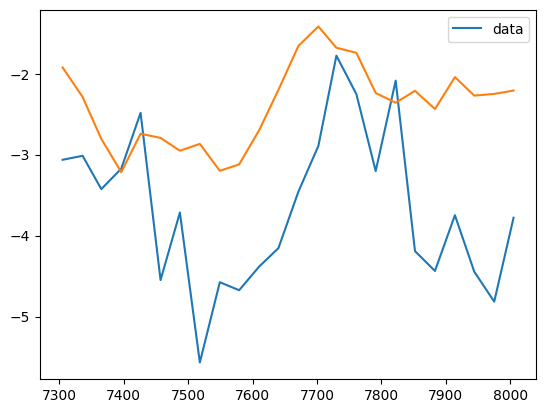

In [ ]:

fig, ax = plt.subplots()
ax.plot(X2, y2, label='data')
ax.plot(X2, y_filtered)
ax.legend()

### Harmonic Time Series

When a periodic time dependent data set, such as NDVI, is decomposed into sum of sinusoidal functions, the procedure is called Harmonic ANalysis of Time series (HANTS) or Fourier Analysis.

Moving data from time or space into frequency domain may be done for various reasons. The main advantage of this is that it becomes much easier to study how the data is varying based on different frequencies. However, my focus here is on the three applications:

- 1. Smoothing the data and removing the outliers,
- 2. Gap filling or obtaining the missing data,
- 3. Data compression

 The goal is to find a set of coefficients which shows the contribution of each sine or cosine function in reconstructing the original data set. There are various method to obtain this.
----
 - Check out for more about Harmonic Time Series [Here](https://mabouali.wordpress.com/projects/harmonic-analysis-of-time-series-hants/#:~:text=When%20a%20periodic%20time%20dependent,analyzing%20of%20the%20data%20set.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def hants_fit_pandas(y_series, n_harmonics=3, base_freq=1/12.0, outlier_threshold=None):
    """
    Fit HANTS to a Pandas Series with DateTime index.

    Args:
        y_series (pd.Series): Time series data (e.g., dict_of_gdf['banana']['VV']).
        n_harmonics (int): Number of harmonics (default=3).
        base_freq (float): Base frequency (e.g., 1/12.0 for annual cycles in monthly data).
        outlier_threshold (float): Remove outliers if residual > threshold (optional).

    Returns:
        pd.Series: Reconstructed time series (same index as input).
        np.array: Coefficients [a0, a1, b1, a2, b2, ...].
    """
    # Convert DateTime index to numeric (days since start)
    t = (y_series.index - y_series.index[0]).total_seconds() / (24 * 3600)  # Convert to days as float
    y = y_series.to_numpy()
    valid = ~np.isnan(y)

    if not np.any(valid):
        print("Warning: All data points are NaN")
        return pd.Series(np.zeros_like(y), index=y_series.index), np.zeros(2 * n_harmonics + 1)

    # Design matrix: [1, cos(w1t), sin(w1t), cos(w2t), sin(w2t), ...]
    A = np.ones((len(t), 2 * n_harmonics + 1))
    for i in range(n_harmonics):
        omega = 2 * np.pi * base_freq * (i + 1)
        A[:, 2*i + 1] = np.cos(omega * t)
        A[:, 2*i + 2] = np.sin(omega * t)

    # Use only valid data points for fitting
    A_valid = A[valid, :]
    y_valid = y[valid]

    # Make sure we have enough data points
    if len(y_valid) < 2 * n_harmonics + 1:
        print(f"Warning: Not enough valid data points ({len(y_valid)}) for {n_harmonics} harmonics")
        n_harmonics_possible = (len(y_valid) - 1) // 2
        if n_harmonics_possible > 0:
            print(f"Reducing to {n_harmonics_possible} harmonics")
            A_valid = A_valid[:, :2*n_harmonics_possible+1]
        else:
            # Just use mean value if we can't fit harmonics
            coeffs = np.zeros(2 * n_harmonics + 1)
            coeffs[0] = np.mean(y_valid)
            return pd.Series(np.full_like(y, coeffs[0]), index=y_series.index), coeffs

    try:
        # Solve least squares
        coeffs, residuals, rank, s = np.linalg.lstsq(A_valid, y_valid, rcond=None)

        # Full reconstruction (for all time points)
        y_fit = A @ coeffs

        # Optional: Outlier rejection
        if outlier_threshold is not None:
            residuals = np.abs(y - y_fit)
            valid_after_filter = valid & (residuals < outlier_threshold)

            # Only refit if we actually filtered some points
            if np.sum(valid_after_filter) < np.sum(valid) and np.sum(valid_after_filter) > 2 * n_harmonics + 1:
                A_valid = A[valid_after_filter, :]
                y_valid = y[valid_after_filter]
                coeffs, *_ = np.linalg.lstsq(A_valid, y_valid, rcond=None)
                y_fit = A @ coeffs

    except np.linalg.LinAlgError:
        print("Warning: Linear algebra error in least squares fitting")
        coeffs = np.zeros(2 * n_harmonics + 1)
        if np.any(valid):
            coeffs[0] = np.mean(y[valid])
        y_fit = np.full_like(y, coeffs[0])

    return pd.Series(y_fit, index=y_series.index), coeffs


def plot_hants_results(y_series, y_fit, title="HANTS Reconstruction", y_label="Value"):
    """
    Plot original vs. HANTS-reconstructed time series.

    Args:
        y_series (pd.Series): Original time series (with gaps/outliers).
        y_fit (pd.Series): Reconstructed series (output from hants_fit_pandas).
        title (str): Plot title.
        y_label (str): Y-axis label (e.g., 'VV backscatter (dB)').
    """
    plt.figure(figsize=(12, 6))

    # Plot original data (with gaps)
    plt.plot(
        y_series.index,
        y_series,
      #  'o',
        color='red',
        linewidth=1,
        alpha=0.7,
        label='Original Data'
    )

    # Plot HANTS reconstruction
    plt.plot(
        y_fit.index,
        y_fit,
        color='blue',
        linewidth=2,
        label='HANTS Fit'
    )

    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Calculate and display R² (coefficient of determination)
    valid = ~np.isnan(y_series)
    if np.sum(valid) > 1:
        y_true = y_series[valid]
        y_pred = y_fit[valid]
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total) if ss_total > 0 else float('nan')
        plt.figtext(0.15, 0.02, f"R² = {r2:.3f}", fontsize=10)

    plt.show()


# Example usage:
# df = pd.DataFrame({'VV': [-3.06, -3.01, -3.42, ...],
#                    'index': pd.date_range('2020-01-01', periods=24, freq='MS')})
# df.set_index('index', inplace=True)
# ts = df['VV']
# y_fit, coeffs = hants_fit_pandas(ts, n_harmonics=3, base_freq=1/12.0)
# plot_hants_results(ts, y_fit, title="VV Backscatter HANTS Reconstruction", y_label="VV (dB)")

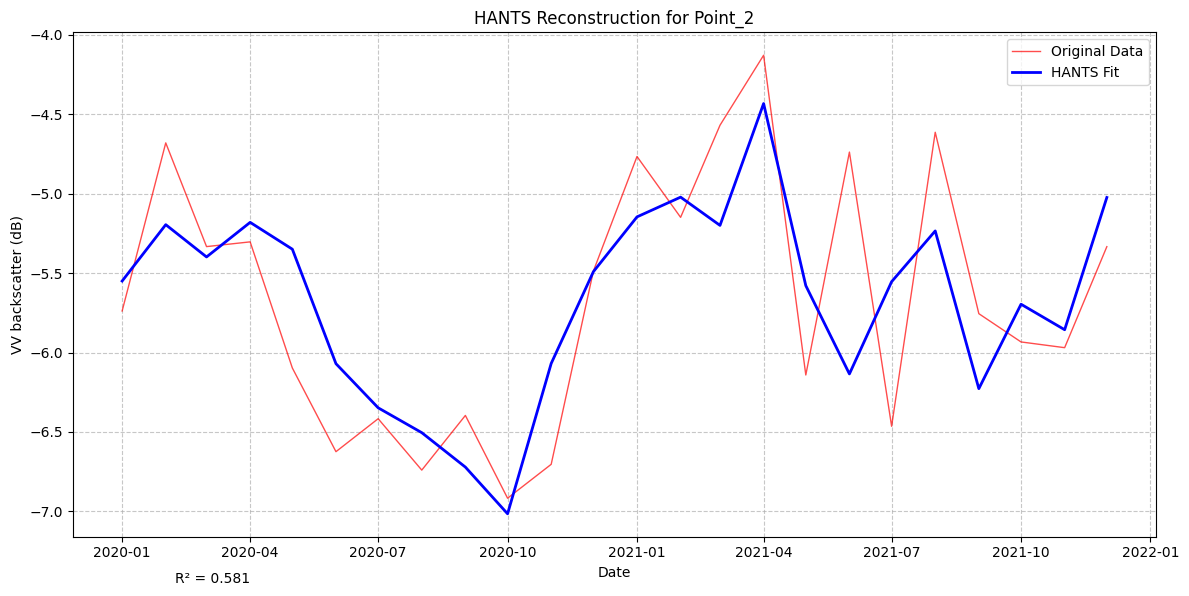

In [ ]:
# Apply HANTS

y_series = pd.Series(dict_of_gdf['banana'].loc[dict_of_gdf['banana']['point_label']=='Point_6'].set_index('datetime')['VV'])


y_fit, coeffs = hants_fit_pandas(
    y_series,
    n_harmonics=6,
    base_freq=1/6.0,  # Annual cycle for monthly data
    outlier_threshold=0
)

plot_hants_results(y_series, y_fit, title="HANTS Reconstruction for Point_2", y_label="VV backscatter (dB)")

### DTW  - Sketch

In [ ]:
features = ['VV', 'VH', 'RVI', 'VVVH']

# Lists to collect time series and labels
series_list = []
label_list = []

# Group by each unique time series identifier
for label_crop, group in final_df.groupby('label_crop'):
    group = group.sort_values('datetime')  # Ensure time order
    series = group[features].values
    series_list.append(series)
    label_list.append(group['label'].iloc[0])  # Take the crop label (e.g., 'banana')

# Convert to tslearn-compatible format
X = to_time_series_dataset(series_list)
y = np.array(label_list)

print(X.shape)  # (n_ts, sz, d)
print(y.shape)  # (n_ts,)

(35, 24, 4)
(35,)
